In [10]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import *
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

import bespoke_functions as f

In [2]:
x = pd.read_csv("/users/Josep/Python/projects/predicting_insolvency/datafiles/train_x.csv", 
                index_col = 'company_id', parse_dates = ['Date of birth'])

y = pd.read_csv("/users/Josep/Python/projects/predicting_insolvency/datafiles/train_y.csv", index_col = 'company_id')
y = np.ravel(y) # most of these models want y to be an array, not a dataframe. np.ravel() handles this

x = f.create_date_components(x) # turn date/timestamps into their components (hour num, month num etc)
x = pd.get_dummies(x) # dummy variables

# fill blanks with column mean
imputer = SimpleImputer()
x = pd.DataFrame(imputer.fit_transform(x), index = x.index, columns = x.columns)

# scale data to have mean of 0 and SD of 1
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), index = x.index, columns = x.columns)

In [4]:
x.head(2)

finex  Account type 2011  Account type 2012  Account type 2013  \
company_id                                                                      
70701      -7.679613           0.856185           0.843446           0.744732   
10693       0.648251           0.856185           0.843446           0.744732   

            Account type 2014  Director loans 2011  Director loans 2012  \
company_id                                                                
70701                0.717218                  0.0         5.945267e-17   
10693                0.717218                  0.0         5.945267e-17   

            Director loans 2013  Director loans 2014  Trade debtors 2011  ...  \
company_id                                                                ...   
70701                       0.0                  0.0           -0.592767  ...   
10693                       0.0                  0.0            0.000000  ...   

            dob_dayofweek  dob_quarter  dob_month  dob_year  dob_dayofyear  \
company_id                                                                   
70701            1.307363     0.639131   0.348102 -0.464578       0.417927   
10693           -1.425231    -1.048427  -1.317962  0.828417      -1.169506   

            dob_dayofmonth  dob_weekofyear  \
company_id                                   
70701             0.846990         0.43082   
10693             1.737997        -1.16685   

            HQ or subsidiary or independent_HQ  \
company_id                                       
70701                                -0.461915   
10693                                -0.461915   

            HQ or subsidiary or independent_Independent  \
company_id                                                
70701                                           1.00986   
10693                                           1.00986   

            HQ or subsidiary or independent_Subsidiary  
company_id                                              
70701                                        -0.700319  
10693                                        -0.700319  

[2 rows x 126 columns]

### VarianceThreshold

In [7]:
# removes all features that have a variance less than x. These features are unlikely to be having a large impact fairly

var_threshold = VarianceThreshold() # default variance cutoff is 0 (i.e. the column has all the same values)
var_threshold_features = pd.DataFrame(var_threshold.fit_transform(x), index = x.index)

var_threshold_features.columns = f.name_the_retained_features(x.columns, var_threshold)

In [8]:
var_threshold_features.head(2)

finex  Account type 2011  Account type 2012  Account type 2013  \
company_id                                                                      
70701      -7.679613           0.856185           0.843446           0.744732   
10693       0.648251           0.856185           0.843446           0.744732   

            Account type 2014  Director loans 2011  Director loans 2012  \
company_id                                                                
70701                0.717218                  0.0         5.945267e-17   
10693                0.717218                  0.0         5.945267e-17   

            Director loans 2013  Director loans 2014  Trade debtors 2011  ...  \
company_id                                                                ...   
70701                       0.0                  0.0           -0.592767  ...   
10693                       0.0                  0.0            0.000000  ...   

            dob_dayofweek  dob_quarter  dob_month  dob_year  dob_dayofyear  \
company_id                                                                   
70701            1.307363     0.639131   0.348102 -0.464578       0.417927   
10693           -1.425231    -1.048427  -1.317962  0.828417      -1.169506   

            dob_dayofmonth  dob_weekofyear  \
company_id                                   
70701             0.846990         0.43082   
10693             1.737997        -1.16685   

            HQ or subsidiary or independent_HQ  \
company_id                                       
70701                                -0.461915   
10693                                -0.461915   

            HQ or subsidiary or independent_Independent  \
company_id                                                
70701                                           1.00986   
10693                                           1.00986   

            HQ or subsidiary or independent_Subsidiary  
company_id                                              
70701                                        -0.700319  
10693                                        -0.700319  

[2 rows x 126 columns]

### Select K-best / select percentile

In [9]:
# performs some univariate analysis with all features, then takes out the worst ones so that it has k features. 
    # in this example we're doing a standard regression 

selectbest = SelectKBest(f_regression, k = 10)
k_best_features = pd.DataFrame(selectbest.fit_transform(x, y, index = x.index)

k_best_features.columns = f.name_the_retained_features(x.columns, selectbest)

In [10]:
k_best_features.head(2)

finex  Total shareholders funds 2014  Delphi score 01 jan 2012  \
company_id                                                                      
70701      -7.679613                      -0.002958                 -3.359526   
10693       0.648251                      -0.010836                 -0.011769   

            Delphi score 01 jan 2013  Delphi score 01 jan 2014  \
company_id                                                       
70701                      -0.232645                 -2.630653   
10693                      -0.054246                  0.546700   

            Financial strength score 01 jan 2011  \
company_id                                         
70701                                  -1.516986   
10693                                   1.483666   

            Financial strength score 01 jan 2013  \
company_id                                         
70701                                  -1.764848   
10693                                   1.295248   

            Financial strength score 01 jan 2014  DWS score 01 jan 2013  \
company_id                                                                
70701                                  -1.738781          -1.056324e+00   
10693                                   1.453908          -8.592168e-16   

            DWS score 01 jan 2014  
company_id                         
70701                    0.281021  
10693                    0.000000

### Recursive Feature Elimination with Cross Validation

In [12]:
# train linear model, and get coefficients. Eliminate weakest feautures and re-train, until we end up with k features
# Cross Validation is a means of avoiding overfitting as we perform iterations of training

l = LogisticRegression(max_iter = 1000) # this is the actual model

# and this is the RFECV wrapper, which will fit and re-fit our model until it's removed enough features
rfecv = RFECV(l, step = 1, 
              min_features_to_select = 10, 
              cv = 5)

# and now we actually apply it to our data
rfecv_df = pd.DataFrame(rfecv.fit_transform(x, y), index = x.index)
rfecv_df.columns = f.name_the_retained_features(x.columns, rfecv)

In [13]:
rfecv_df.head(2)

Cash 2013  Working capital 2011  Working capital 2012  \
company_id                                                          
70701       -0.290141             -0.012994             -0.010823   
10693       -0.185635             -0.008982             -0.003312   

            Total assets 2012  Total shareholders funds 2011  \
company_id                                                     
70701               -0.065799                      -0.013952   
10693               -0.098490                      -0.022756   

            Cashflow total 2014  Delphi score 01 jan 2014  \
company_id                                                  
70701                       0.0                 -2.630653   
10693                       0.0                  0.546700   

            DWS score 01 jan 2014  dob_month  dob_dayofyear  
company_id                                                   
70701                    0.281021   0.348102       0.417927  
10693                    0.000000  -1.317962      -1.169506

### L1 Penalization

In [50]:
# Regression models often get instantiated with an 'L1' or 'L2' penalization.
# 'L1' "has a sparse solution" which means that a lot of your coefficients will be 0
    # this means that the features will have no impact on the outcome
    
reg = LogisticRegression(penalty = 'l1',
                         solver = 'liblinear',
                         C = 0.1) # lower value means more regularization

reg.fit(x, y)

# because reg has an l1 penalty, SelectFromModel will automatically strip out all the coefficients smaller than 1e-5
model = SelectFromModel(reg, prefit = True) # prefit tells it that reg has already been fitted
l1_x = pd.DataFrame(model.transform(x), index = x.index) # strips out those columns which model said were no use
l1_x.columns = f.name_the_retained_features(x.columns, model)

In [55]:
l1_x.head(2)

finex  Account type 2012  Trade debtors 2011  \
company_id                                                    
70701      -7.679613           0.843446           -0.592767   
10693       0.648251           0.843446            0.000000   

            Total debtors 2014  Cash 2013  Trade creditors 2014  \
company_id                                                        
70701                -0.399443  -0.290141          1.172702e-16   
10693                -0.222895  -0.185635          1.172702e-16   

            Total assets 2014  Director loans long term liabilities 2014  \
company_id                                                                 
70701               -0.327963                                  -0.058963   
10693               -0.521009                                  -0.058963   

            Total shareholders funds 2014  Turnover 2012  ...  \
company_id                                                ...   
70701                           -0.002958   1.803511e-16  ...   
10693                           -0.010836   1.803511e-16  ...   

            Mortgages registered in 2005  Mortgages registered in 2006  \
company_id                                                               
70701                       1.130089e+00                     -0.248178   
10693                       3.821502e-17                      0.000000   

            Mortgages registered in 2010  Mortgages registered in 2011  \
company_id                                                               
70701                          -0.287496                     -0.289793   
10693                           0.000000                      0.000000   

            Mortgages in 2012  Mortgages in 2014  dob_dayofweek  dob_year  \
company_id                                                                  
70701               -0.296553          -0.301147       1.307363 -0.464578   
10693                0.000000           0.000000      -1.425231  0.828417   

            dob_dayofmonth  HQ or subsidiary or independent_HQ  
company_id                                                      
70701             0.846990                           -0.461915  
10693             1.737997                           -0.461915  

[2 rows x 41 columns]

### L2 Penalization

In [7]:
# l2 is both similar and different to l1. Now your coefficients will be edged closer to 0, but will not become exactly 0
# it's because the model tries to minimise error + loss, and l2 inflates the loss by adding squared weights
# because the squaring makes the loss higher, it doesn't take as much work to reduce it. basically.

reg = LogisticRegression(penalty = 'l2',
                         solver = 'liblinear',
                         C = 0.1) # lower value means more regularization

reg.fit(x, y);

# we could use SelectFromModel again to strip out our weaker features, but if we did that we might as well be using l1

### PCA (Principal Components Analysis)

In [7]:
# PCA is a unique form of dimension reduction. None of your features get removed, but they get combined into new (fewer)
# features. The good news is that none of your dimensionality is lost, the bad news is that your new features aren't very easy 
# to interpret - as they're a combination of all other features.

# we need to work out how many components (new combined features) we're going to make
for number_components in range(20):
    pca = PCA(n_components = number_components, random_state = 42)
    pca.fit_transform(x)


TypeError: 'Text' object is not callable

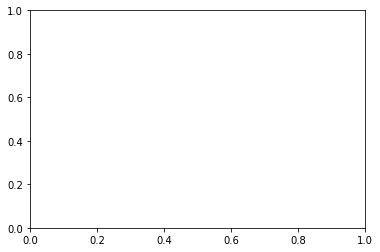

In [25]:
fig, ax = plt.subplots()
# fig.figsize(10,6)
ax.title(f"PCA - {number_components} components")
ax.plot(pca.explained_variance_)